### Vistualization ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.font_manager import fontManager
fontManager.addfont('Sarabun-Regular.ttf')
import warnings
warnings.filterwarnings('ignore')


In [2]:
visual_df = pd.read_csv('DataSet/active_inactive_scoms.csv',encoding='utf-8').set_index('circuit_id')

In [3]:
visual_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159053 entries, 4221J1183 to 3944J7784
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   install_date             159053 non-null  object 
 1   inactive_date            79540 non-null   object 
 2   package                  159053 non-null  object 
 3   package_startdate        159053 non-null  object 
 4   package_enddate          68 non-null      object 
 5   ba_id                    159053 non-null  int64  
 6   customer_type_name       158314 non-null  object 
 7   acc_type_update          159053 non-null  object 
 8   org_dep_abbr             158918 non-null  object 
 9   package_group_name_th    159053 non-null  object 
 10  package_info_name        159053 non-null  object 
 11  start_date_sale_package  158476 non-null  object 
 12  end_date_sale_package    158137 non-null  object 
 13  package_price            159053 non-null  float64
 14

In [4]:
visual_df.columns

Index(['install_date', 'inactive_date', 'package', 'package_startdate',
       'package_enddate', 'ba_id', 'customer_type_name', 'acc_type_update',
       'org_dep_abbr', 'package_group_name_th', 'package_info_name',
       'start_date_sale_package', 'end_date_sale_package', 'package_price',
       'active_status', 'claims', 'tenure_month', 'ipphone', 'tv_box', 'WiFi',
       'pay_first', 'mobile', 'dl_speed', 'ul_speed'],
      dtype='object')

In [5]:
visual_df['ba_id'] = visual_df['ba_id'].astype(object)

In [27]:
visual_df.describe()

,package_price,active_status,claims,tenure_month,ipphone,tv_box,WiFi,pay_first,mobile,dl_speed,ul_speed
count,159053.000000,159053.000000,159053.000000,159053.000000,159053.000000,159053.000000,159053.000000,159053.000000,159053.000000,159053.000000,159053.000000
mean,397.993178,0.499915,0.671330,55.234865,0.037736,0.033008,0.000119,0.243780,0.029525,414.370927,317.632732
std,151.862592,0.500002,4.989167,27.129605,0.190557,0.178658,0.010929,0.429363,0.169273,292.174476,171.638728
min,100.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
25%,290.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,200.000000
50%,360.000000,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,300.000000
75%,490.000000,1.000000,0.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,400.000000
max,6150.000000,1.000000,426.000000,168.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1000.000000


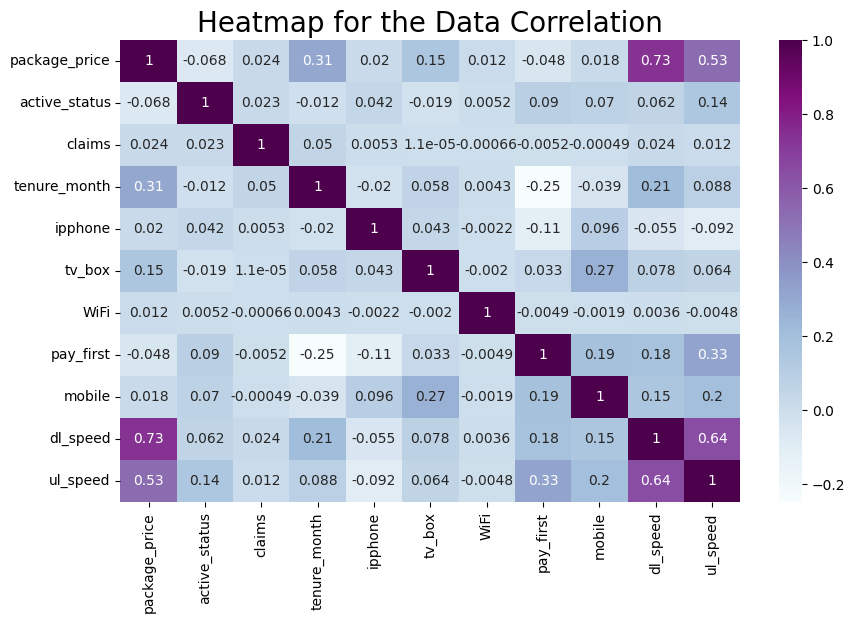

In [6]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(visual_df.drop(['install_date', 'inactive_date', 'package', 'package_startdate',
       'package_enddate', 'ba_id', 'customer_type_name', 'acc_type_update',
       'org_dep_abbr', 'package_group_name_th', 'package_info_name',
       'start_date_sale_package', 'end_date_sale_package',], axis=1).corr(), cmap = 'BuPu', annot = True)
plt.title('Heatmap for the Data Correlation', fontsize = 20)
plt.show()

In [7]:
visual_df['claims'].sort_values(ascending=False).value_counts()

claims
0      130928
1       14815
2        5118
3        2463
4        1344
        ...  
149         1
73          1
151         1
152         1
426         1
Name: count, Length: 155, dtype: int64

In [8]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

In [9]:
# สัดส่วน สถานะบริการ

def chart_churn_by_service(df,para,h_title):


# กรองเฉพาะโปรโมชั่นที่มีจำนวนลูกค้ามากกว่า 5000 คน
    # l1 = list(df['สถานะบริการ'].value_counts())
    l1 = list(df[para].value_counts())
    pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]
    
    fig = plt.figure(figsize=(6,6))
    fig.suptitle(h_title, fontsize = 15,color='darkblue')

    # fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
    # plt.pie(data_values, labels=data_index, autopct='%1.2f%%',explode=[0,0.02])
#     plt.subplot(1,2,1)
    plt.pie(pie_values,labels = ['Active','Inactive'], 
            autopct = '%1.2f%%',
            explode = (0.03,0),
            colors = palette,
            wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
    plt.title('Active and Inactive Customers %',);

    # plt.subplot(1,2,2)
    # ax = sns.countplot(data = df, 
    #                 # x='สถานะบริการ',
    #                 x=para,
    #                 palette = "Set2", 
    #                 edgecolor = 'black',
    #                 hue='claims')
    # for i in ax.containers:
    #     ax.bar_label(i,)
    # ax.set_xticklabels(['Inactive','Active'])
    # plt.title('Correlative: Claim Number to Service Status')
    # plt.show()
    # Claim = df["claims"].value_counts()
    # print(Claim)
    # print(l1)
    # print(df['active_status'].value_counts())

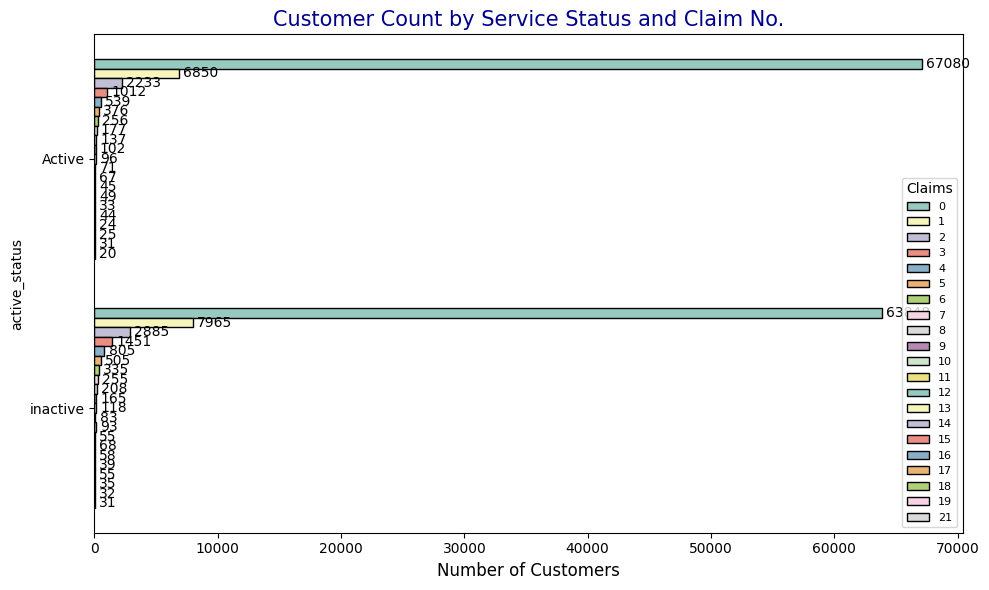

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 14, 13, 15, 16, 17, 19, 18,
       21],
      dtype='int64', name='claims')


In [10]:
# นับจำนวนลูกค้า Claim/Churn
claim_counts = visual_df["claims"].value_counts()

# กรองเฉพาะโปรโมชั่นที่มีจำนวนลูกค้ามากกว่า 5000 คน
major_claim = claim_counts[claim_counts > 50].index

# สร้างกราฟ countplot และสลับแกน x และ y
plt.figure(figsize=(10, 6))  # ปรับขนาดกราฟให้เหมาะสม
ax = sns.countplot(data=visual_df[visual_df["claims"].isin(major_claim)],
                   y="active_status", hue="claims", orient="v", palette="Set3",
                   edgecolor="black", order=visual_df["active_status"].value_counts().index)

# แสดงจำนวนลูกค้าบนแท่งกราฟ
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# ปรับแต่งกราฟ
ax.set_xlabel("Number of Customers", fontsize=12)
# ax.set_ylabel("Service Status", fontsize=12)
ax.set_yticklabels(['Active','inactive'])

ax.legend(title="Claims", loc="lower right", fontsize=8)
plt.title("Customer Count by Service Status and Claim No.", fontsize=15, color='darkblue')
plt.tight_layout()
plt.show()
print(major_claim)


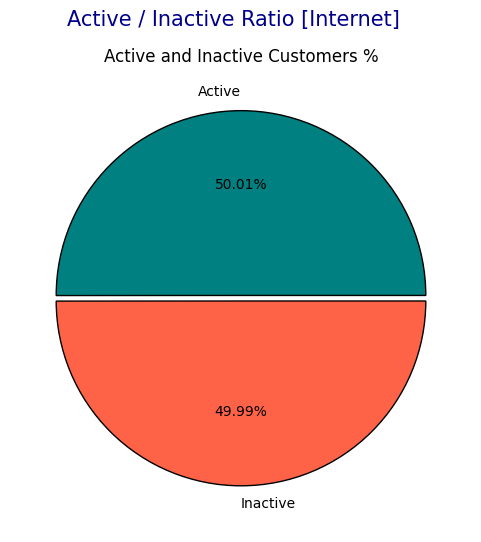

In [11]:
chart_churn_by_service(df=visual_df,para='active_status',h_title='Active / Inactive Ratio [Internet]')

In [12]:
visual_df.columns

Index(['install_date', 'inactive_date', 'package', 'package_startdate',
       'package_enddate', 'ba_id', 'customer_type_name', 'acc_type_update',
       'org_dep_abbr', 'package_group_name_th', 'package_info_name',
       'start_date_sale_package', 'end_date_sale_package', 'package_price',
       'active_status', 'claims', 'tenure_month', 'ipphone', 'tv_box', 'WiFi',
       'pay_first', 'mobile', 'dl_speed', 'ul_speed'],
      dtype='object')

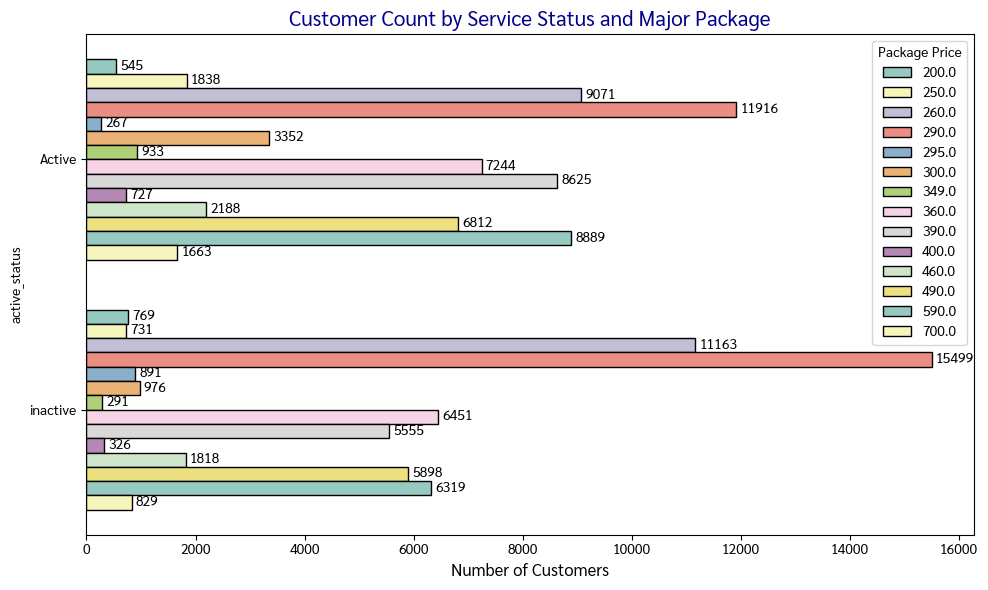

package
ค่าบริการ Fiber 2U 100Mb/100Mb_Gigabolt Max For DE                                                                              16454
ค่าบริการ Fiber 2U 300Mb/300Mb_Gigabolt Max For DE                                                                              13695
ค่าบริการ NT ValueMAX Fiber 300Mb/300Mb (จ่ายพร้อมใช้)                                                                           7329
ค่าบริการ Fiber 2U 1Gb/200Mb_Gigabolt Max                                                                                        6977
ค่าบริการ NT MAX DFiber 300Mbps/300Mbps (จ่ายพร้อมใช้)                                                                           6517
                                                                                                                                ...  
ค่าบริการ NT SME MAX BUFFET 600Mbps/400Mbps 1 Fixed IP (ใช้ก่อนจ่ายทีหลัง)                                                          1
PM627 : ค่าบริการ Fiber 2U 250Mb/250Mb ตัดถ่าย Net bun

In [13]:
# นับจำนวนลูกค้าในแต่ละโปรโมชั่น
package_counts = visual_df["package"].value_counts()

# กรองเฉพาะโปรโมชั่นที่มีจำนวนลูกค้ามากกว่า 5000 คน
major_package = package_counts[package_counts > 1000].index
plt.rcParams['font.family'] = 'Sarabun'
# สร้างกราฟ countplot และสลับแกน x และ y
plt.figure(figsize=(10, 6))  # ปรับขนาดกราฟให้เหมาะสม
ax = sns.countplot(data=visual_df[visual_df["package"].isin(major_package)],
                   y="active_status", hue="package_price", orient="v", palette="Set3",
                   edgecolor="black", order=visual_df["active_status"].value_counts().index)

# แสดงจำนวนลูกค้าบนแท่งกราฟ
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# ปรับแต่งกราฟ
ax.set_xlabel("Number of Customers", fontsize=12)
# ax.set_ylabel("Service Status", fontsize=12)
ax.set_yticklabels(['Active','inactive'])

ax.legend(title="Package Price", loc="upper right", fontsize=10)
plt.title("Customer Count by Service Status and Major Package", fontsize=15, color='darkblue')
plt.tight_layout()
plt.show()
print(package_counts)


In [14]:
package_df = visual_df.groupby(['package','package_price']).package_price.transform('count')
package_df

circuit_id
4221J1183    13695
7351J4969    13695
4481J6998     2492
7435J8492     6511
3223J8807     5116
             ...  
5624J1894     3780
7320J4879     2958
5558J9574      354
5356J6470     1160
3944J7784     1383
Name: package_price, Length: 159053, dtype: int64

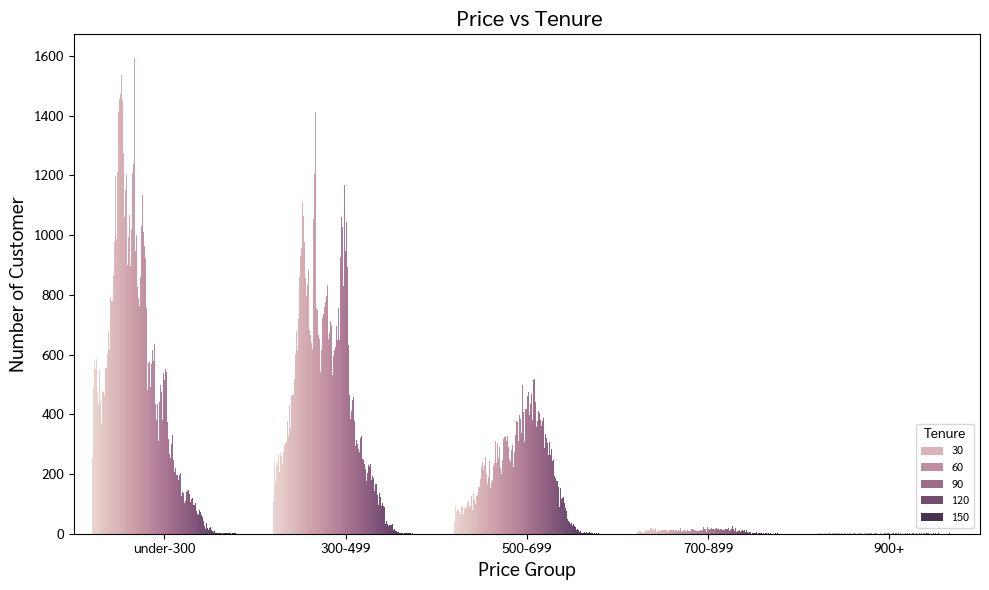

In [15]:
# Create a countplot for Price and Tenure
price_bins = [0, 300, 500, 700, 900, 1000]
price_labels = ['under-300', '300-499', '500-699', '700-899', '900+']
visual_df['price_group'] = pd.cut(visual_df['package_price'], bins=price_bins, labels=price_labels, include_lowest=False)

# Create a countplot for Age and Service_Trans
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=visual_df, x='price_group', hue='tenure_month', orient='h')

# Add count values on bars
for p in ax.patches:
   x = p.get_width()
   y = p.get_y() + p.get_height() / 2
   value = int(p.get_width())
   # ax.text(x + 0.6, y, value, ha="left", va="center")
ax.legend(title="Tenure", loc="lower right", fontsize=8)
plt.title(' Price vs Tenure', fontsize=16)
plt.xlabel('Price Group', fontsize=14)
plt.ylabel('Number of Customer', fontsize=14)
plt.tight_layout()
plt.show()



In [16]:
# Distribution Check
def chart_distribution(dataset, columns_list, kdeplot_title, histplot_title,h_title,y_scatt):
    # plt.title("Customer Count by Service Status and Major Promotions", fontsize=14)
    fig = plt.figure(figsize=(18,5))
    fig.suptitle(h_title, fontsize = 15,color='darkblue')
    
    # fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

    plt.subplot(1,3,1)
    ax = sns.kdeplot(dataset[columns_list][(dataset["active_status"] == 0)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
    ax = sns.kdeplot(dataset[columns_list][(dataset["active_status"] == 1)], color='#008080', fill= True, alpha=.7, linewidth=0)
    ax.legend(["Inactive","Active"],loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(columns_list)
    ax.set_title(kdeplot_title)

    plt.subplot(1,3,2)
    ax = sns.histplot(dataset[columns_list][(dataset["active_status"] == 0)], bins=30, kde=False, color='#FF6347')
    ax = sns.histplot(dataset[columns_list][(dataset["active_status"] == 1)], bins=30, kde=False, color='#008080')
    ax.legend(["Inactive","Active"],loc='upper right')
    ax.set(title = histplot_title)
    ax.set_ylabel('No. of Customers')
    ax.set_xlabel(columns_list)
    
    plt.subplot(1,3,3)
    ax = sns.scatterplot(x = dataset[columns_list], y = dataset[y_scatt], hue = "active_status", data = dataset, palette =palette2, edgecolor='grey', alpha = 0.8, s=9)
    plt.title('Monthly Charges vs Tenure')
    plt.show()

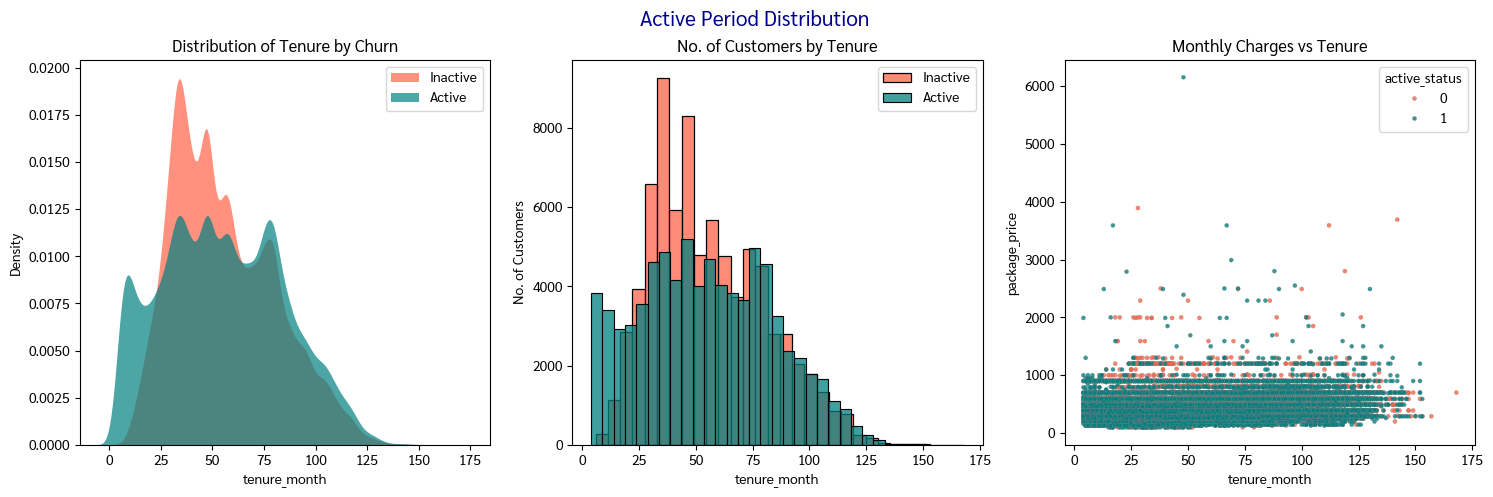

In [17]:
chart_distribution(dataset=visual_df, columns_list='tenure_month', kdeplot_title='Distribution of Tenure by Churn',  histplot_title="No. of Customers by Tenure",h_title='Active Period Distribution',y_scatt='package_price')

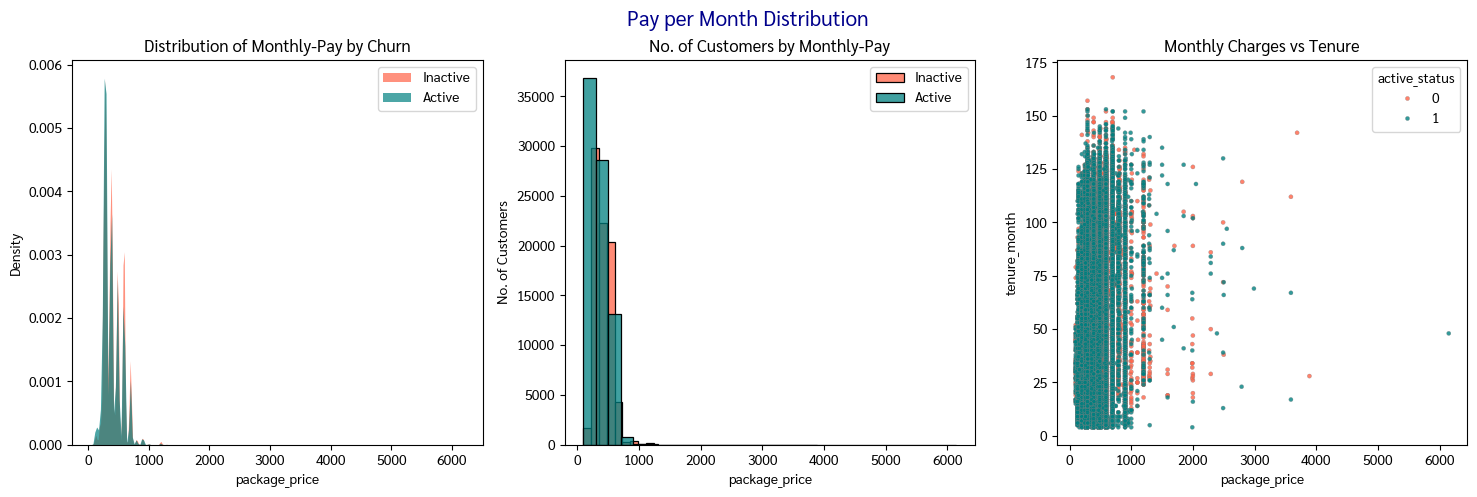

In [18]:
chart_distribution(dataset=visual_df, columns_list='package_price', kdeplot_title='Distribution of Monthly-Pay by Churn',  histplot_title="No. of Customers by Monthly-Pay",h_title='Pay per Month Distribution',y_scatt='tenure_month')


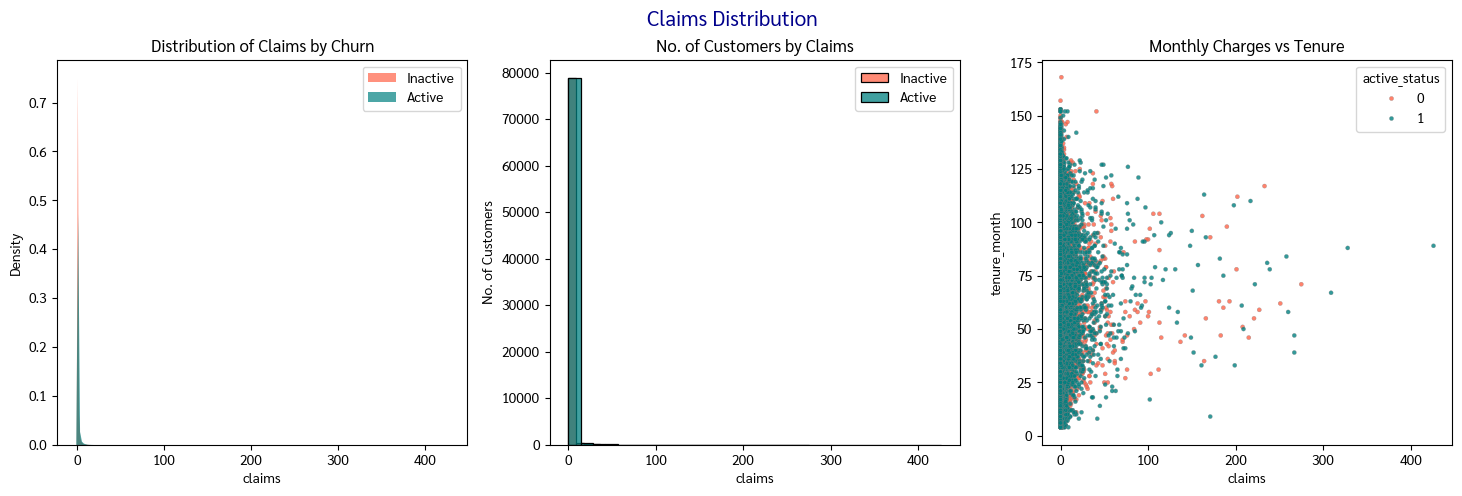

In [19]:
chart_distribution(dataset=visual_df, columns_list='claims', kdeplot_title='Distribution of Claims by Churn',  histplot_title="No. of Customers by Claims",h_title='Claims Distribution',y_scatt='tenure_month')


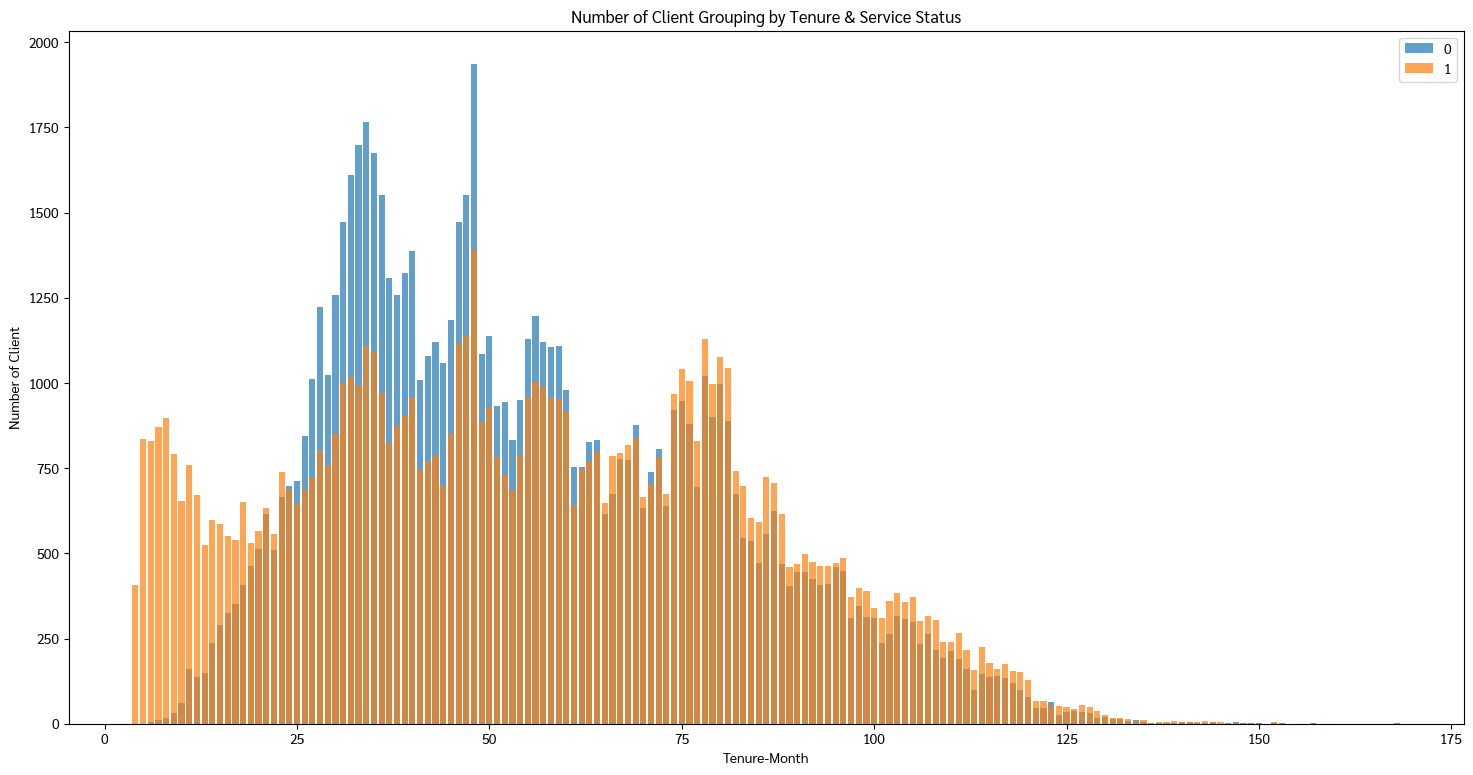

     tenure_month  active_status  counts
0               4              1     407
1               5              1     837
2               6              0       4
3               6              1     831
4               7              0      10
..            ...            ...     ...
291           152              1       5
292           153              0       1
293           153              1       2
294           157              0       1
295           168              0       1

[296 rows x 3 columns]


In [20]:
grouped = visual_df.groupby(['tenure_month', 'active_status']).size().reset_index(name='counts')

# สร้างกราฟแท่งเปรียบเทียบจำนวนลูกค้าในแต่ละกลุ่ม
plt.figure(figsize=(18, 9))
for service_status, group in grouped.groupby('active_status'):
    plt.bar(group['tenure_month'], group['counts'], label=service_status, alpha=0.7)
plt.xlabel('Tenure-Month')
plt.ylabel('Number of Client')
plt.title('Number of Client Grouping by Tenure & Service Status')
plt.legend()
plt.show()

print(grouped)

In [21]:
# Churn by bundled service
# defining function for countplots
def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
        axs[i].set_title(data + f' vs {hue}', size=15)
        for i in ax.containers:
            ax.bar_label(i,size=15)
            ax.set_xlabel('')
    plt.tight_layout()
    # enumerate(columns_list)    


In [22]:
visual_df.columns

Index(['install_date', 'inactive_date', 'package', 'package_startdate',
       'package_enddate', 'ba_id', 'customer_type_name', 'acc_type_update',
       'org_dep_abbr', 'package_group_name_th', 'package_info_name',
       'start_date_sale_package', 'end_date_sale_package', 'package_price',
       'active_status', 'claims', 'tenure_month', 'ipphone', 'tv_box', 'WiFi',
       'pay_first', 'mobile', 'dl_speed', 'ul_speed', 'price_group'],
      dtype='object')

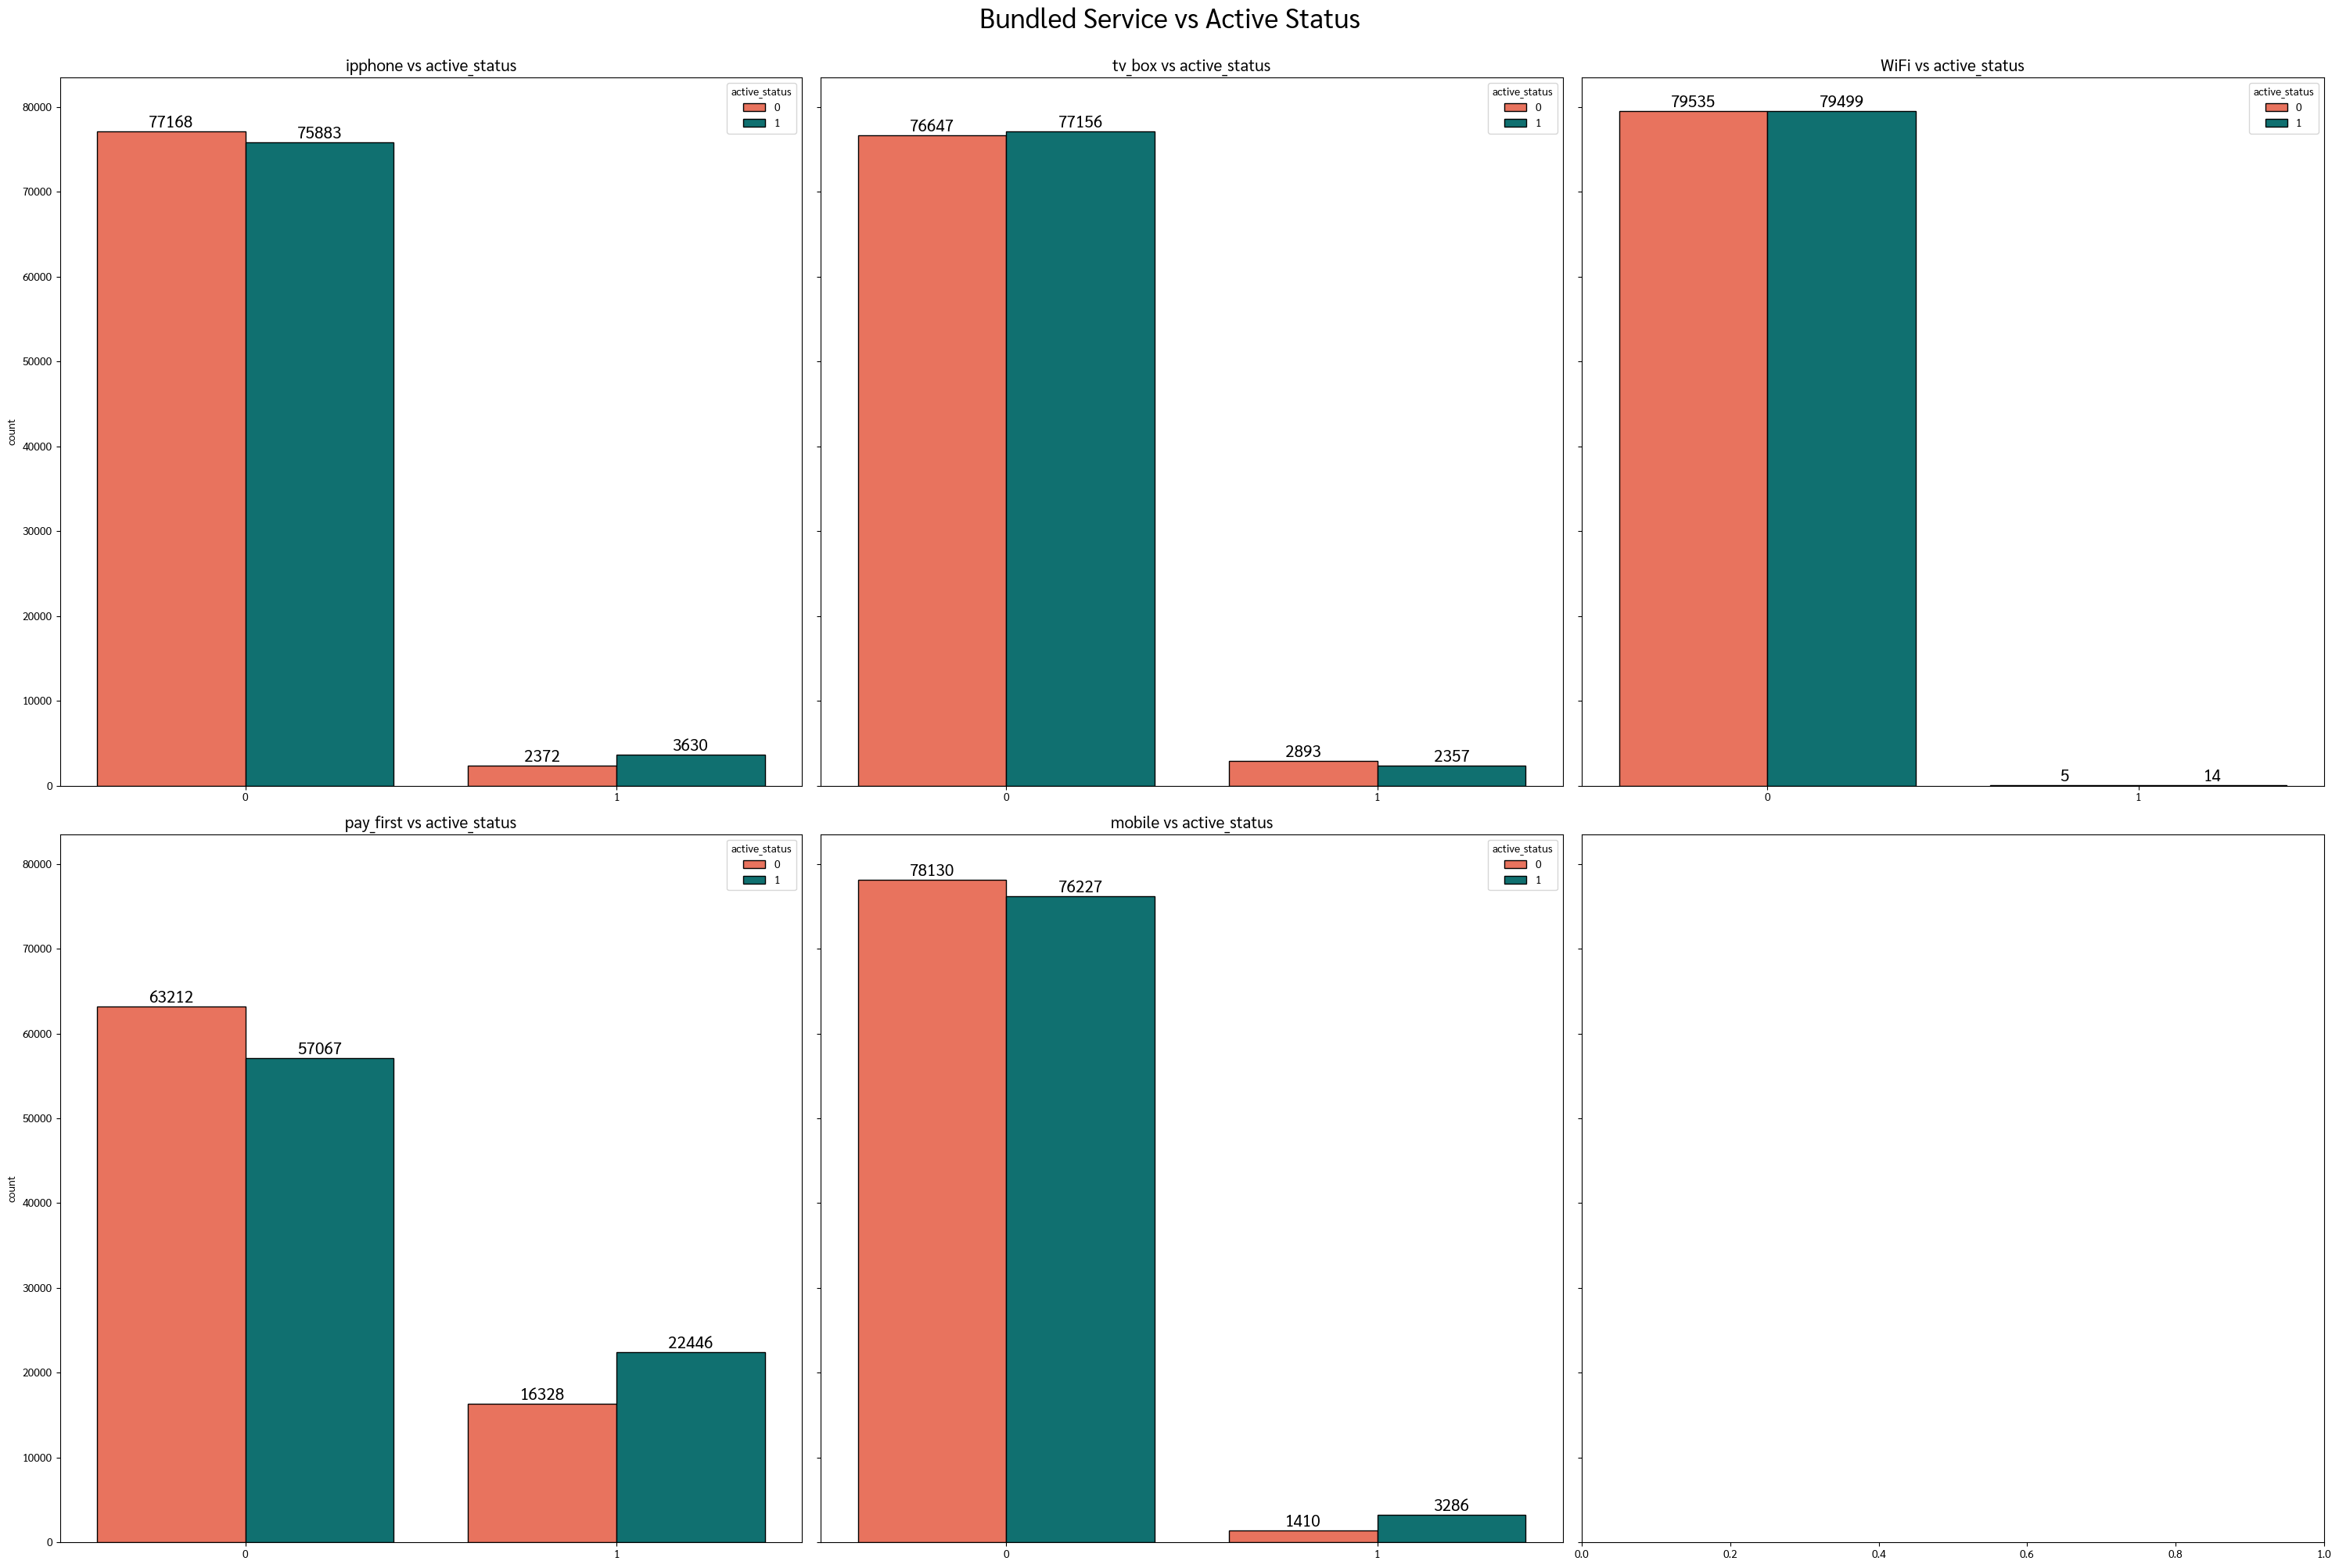

In [23]:
bundeled_list = ['ipphone', 'tv_box', 'WiFi','pay_first', 'mobile']
hue = "active_status"
figsize = (30,20)
countplots_custom(dataset=visual_df, columns_list=bundeled_list, rows=2, cols=3, figsize=figsize, hue = hue, palette = palette2, suptitle='Bundled Service vs Active Status')

In [24]:
numeric_columns = ['package_price','active_status', 'tenure_month', 'claims',
                    'ipphone', 'tv_box', 'pay_first',
                    'mobile', 'dl_speed','ul_speed']
visual_df[numeric_columns]

,package_price,active_status,tenure_month,claims,ipphone,tv_box,pay_first,mobile,dl_speed,ul_speed
circuit_id,,,,,,,,,,
4221J1183,360.0,0,81,0,0,0,0,0,300,300
7351J4969,360.0,0,31,0,0,0,0,0,300,300
4481J6998,700.0,0,80,0,0,0,0,0,1000,500
7435J8492,390.0,0,40,0,0,0,0,0,300,300
3223J8807,490.0,0,63,0,0,0,0,0,500,500
...,...,...,...,...,...,...,...,...,...,...
5624J1894,260.0,1,9,0,0,0,0,0,300,300
7320J4879,290.0,1,11,0,0,0,1,0,300,300
5558J9574,295.0,1,6,0,0,0,1,0,1000,500


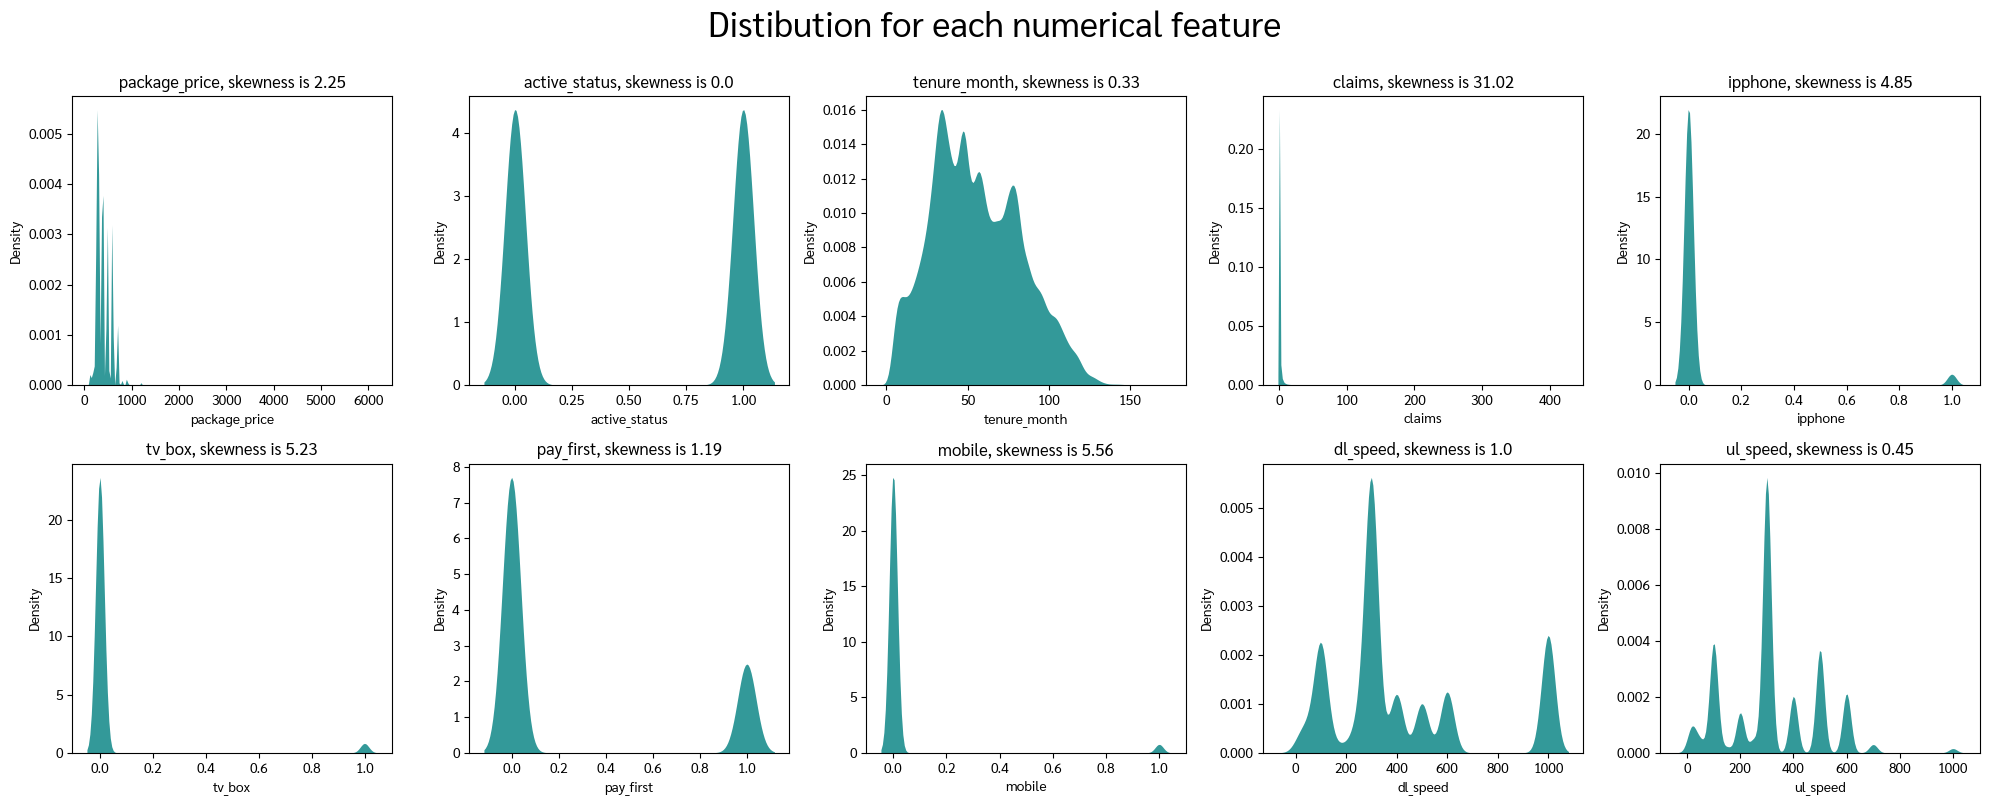

In [25]:
# Checking for distributions : Numberic feature distribution

def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,8))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=visual_df, columns_list=numeric_columns, rows=2, cols=5, suptitle='Distibution for each numerical feature')
plt.tight_layout()

<Axes: >

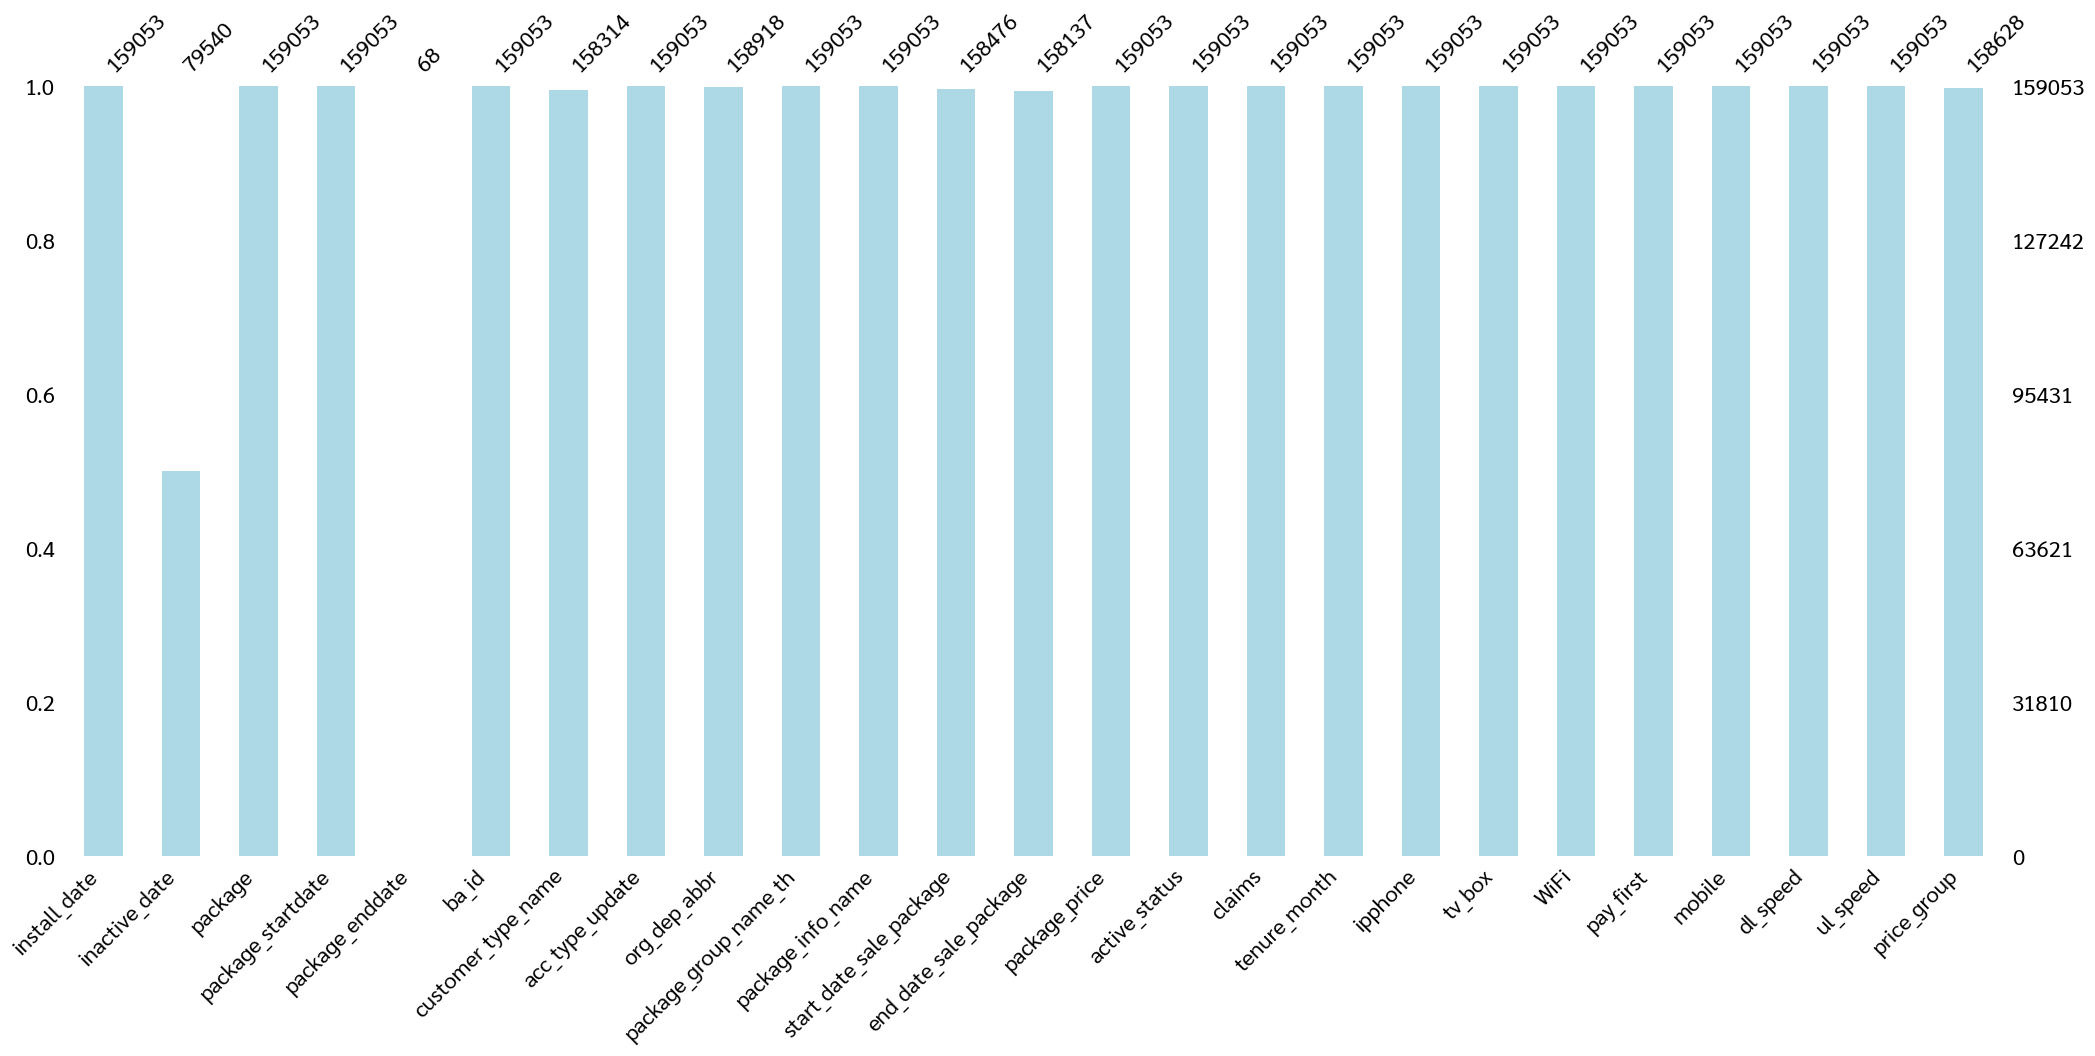

In [26]:
msno.bar(visual_df, color = "lightblue")